Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Loading data from a file

In [ ]:
astronauts = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-14/astronauts.csv')

In [ ]:
astronauts.head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0


Visualizing the distribution of space missions over time.

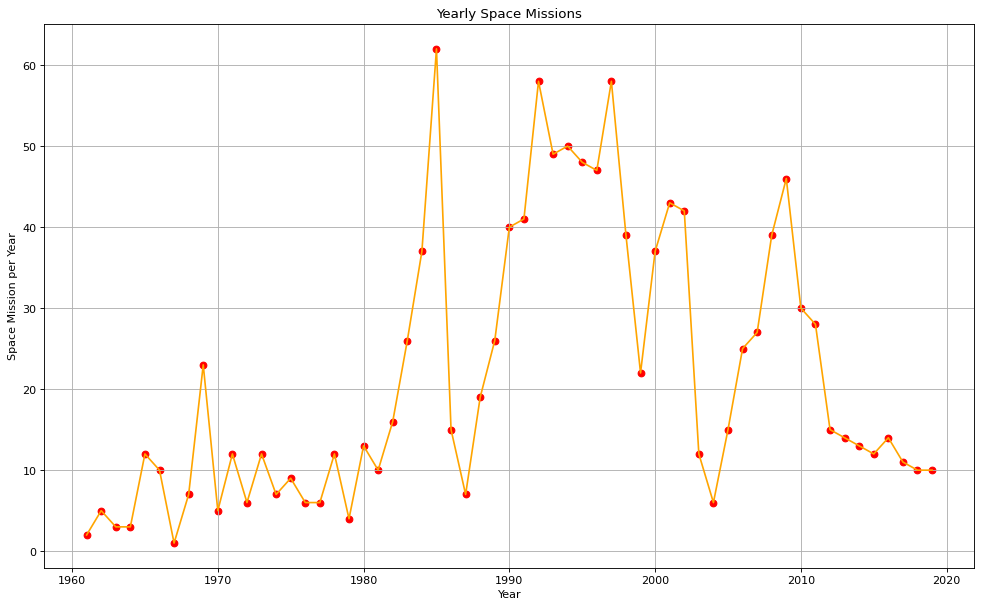

In [ ]:

ast = astronauts.sort_values(by='year_of_mission') # The dataset was sorted based on the dates of space missions and stored in another DataFrame.
countMission = ast.groupby(['year_of_mission']).id.count() # The sorted dataset was grouped by years and transferred into an array.

plt.figure(figsize=(15,9),dpi=80)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Space Mission per Year')
plt.title('Yearly Space Missions')
plt.scatter(countMission.index,countMission.values,c='red')
plt.plot(countMission.index,countMission.values,c='orange')


The Geopandas library, which is required for spatial visualization, is installed.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.1 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

The Geopandas world map dataset to be used is as follows: This dataset contains low-resolution Natural Earth data and can be utilized for visualizing world maps using Geopandas.

In [ ]:
worldTemp = world.sort_values(by='name')

world.tail(30)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
147,108116615.0,Asia,Philippines,PHL,376795,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
148,31949777.0,Asia,Malaysia,MYS,364681,"MULTIPOLYGON (((100.08576 6.46449, 100.25960 6..."
149,433285.0,Asia,Brunei,BRN,13469,"POLYGON ((115.45071 5.44773, 115.40570 4.95523..."
150,2087946.0,Europe,Slovenia,SVN,54174,"POLYGON ((13.80648 46.50931, 14.63247 46.43182..."
151,5520314.0,Europe,Finland,FIN,269296,"POLYGON ((28.59193 69.06478, 28.44594 68.36461..."
152,5454073.0,Europe,Slovakia,SVK,105079,"POLYGON ((22.55814 49.08574, 22.28084 48.82539..."
153,10669709.0,Europe,Czechia,CZE,250680,"POLYGON ((15.01700 51.10667, 15.49097 50.78473..."
154,6081196.0,Africa,Eritrea,ERI,2065,"POLYGON ((36.42951 14.42211, 36.32322 14.82249..."
155,126264931.0,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."
156,7044636.0,South America,Paraguay,PRY,38145,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7..."


The dataset obtained from the GitHub repository and the dataset from Geopandas were checked for matching country names. Any differences found were identified and added to an array.

In [ ]:
wrongNames = []
for i in ast.nationality:
  flag = False
  for k in world.name:
    if(i == k):
      flag = True
  if(flag == False):
    if((i in wrongNames) == False):
      wrongNames.append(i)

print(wrongNames)

['U.S.S.R/Russia', 'U.S.', 'Czechoslovakia', 'Hungry', 'Netherland', 'U.K.', 'U.S.S.R/Ukraine', 'U.K./U.S.', 'Republic of South Africa', 'Malysia', 'Korea', 'UAE']


The inconsistent country names identified in the previous cell were updated in the dataset.

In [ ]:
for i in range(len(ast.nationality)):
  if(ast.nationality.loc[i]=='U.S.S.R/Russia'):
    ast.nationality.loc[i] ='Russia'
  elif(ast.nationality.loc[i]=='U.S.'):
    ast.nationality.loc[i] ='United States of America'
  elif(ast.nationality.loc[i]=='Hungry'):
    ast.nationality.loc[i] ='Hungary'
  elif(ast.nationality.loc[i]=='Netherland'):
    ast.nationality.loc[i] ='Netherlands'
  elif(ast.nationality.loc[i]=='U.K.'):
    ast.nationality.loc[i] ='United Kingdom'
  elif(ast.nationality.loc[i]=='U.K./U.S.'):
    ast.nationality.loc[i] ='United Kingdom'
  elif(ast.nationality.loc[i]=='U.S.S.R/Ukraine'):
    ast.nationality.loc[i] ='Ukraine'
  elif(ast.nationality.loc[i]=='Republic of South Africa'):
    ast.nationality.loc[i] ='South Africa'
  elif(ast.nationality.loc[i]=='Malysia'):
    ast.nationality.loc[i] ='Malaysia'
  elif(ast.nationality.loc[i]=='UAE'):
    ast.nationality.loc[i] ='United Arab Emirates'


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


The "nationality" column from the dataset containing space missions was added to an array for future validation.

In [ ]:
temp = ast.pivot_table(columns=['nationality'], aggfunc='size')

A new column was added to express the number of space missions conducted by each country, and its initial values were set to 0.

In [ ]:
world['Count'] = 0

To better visualize and handle the significant differences in the number of space missions between countries, the counts of space missions were stored in a logarithmic scale.

In [ ]:
import math
for i in range(len(temp.index)):
  for k in range(len(world.name)):
    if(temp.index[i] == world.name[k]):
      world.Count[k] = math.log(temp[i]*10)


<ipython-input-13-c60c1ec18d0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world.Count[k] = math.log(temp[i]*10)


In [ ]:
world.head(15)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",5
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",9
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",0
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",0
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",0
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",0


Visualizing the distribution of space missions across countries on a world map.

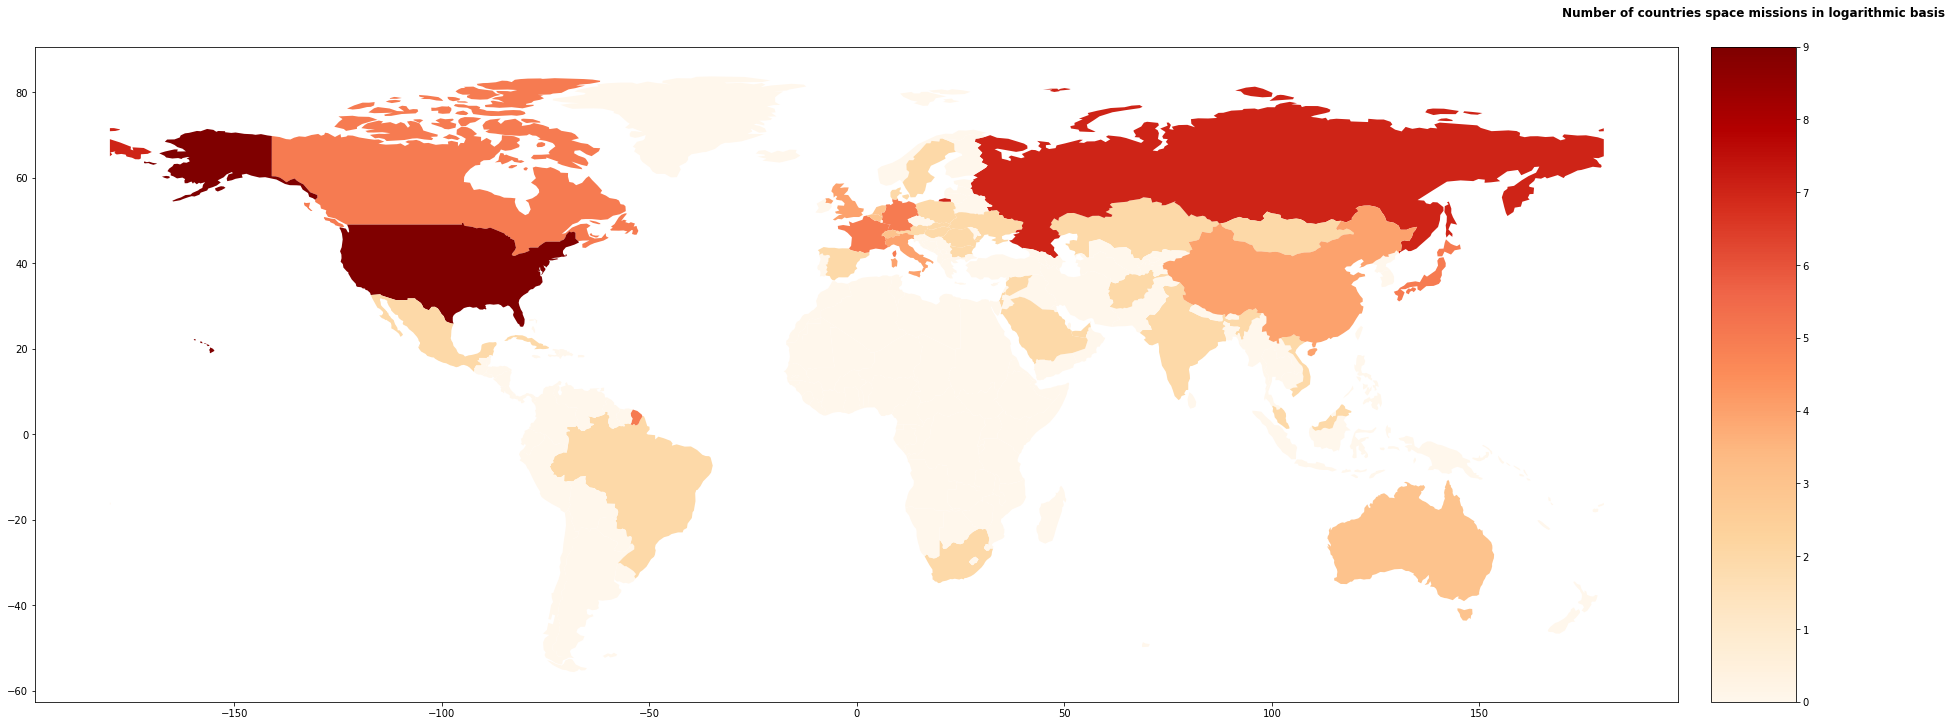

In [ ]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

world = world[(world.name!="Antarctica")] #To improve the visualization, the dataset for the Antarctica continent was excluded.


fig, ax = plt.subplots(1, 1,figsize=(32, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.title('Number of countries space missions in logarithmic basis', pad = 30,fontweight="bold")
world.plot(column='Count', ax=ax, legend=True,cmap='OrRd',cax=cax)

In [ ]:
df = pd.DataFrame()

To enable animated visualization, data preprocessing steps were applied to the old dataset, resulting in the creation of a new dataset.

In [ ]:
years = []
for i in range(ast['year_of_mission'].min(),ast['year_of_mission'].max()+1):
  years.append(i)          #The year_of_mission column from the Astronaut dataset was incorporated into the new dataset.
df['years'] = years


countries = []
for i in ast.nationality:  #The country names present in the astronaut dataset were added to the array named "COUNTRIES."
  if(i in countries):
    continue
  else:
    countries.append(i)

for i in countries:
  df[i] = 0





In the newly created dataset, a column was generated for each country from the old dataset, and the information about the number of missions conducted by each country in which years was added.

In [ ]:
for i in range(len(ast.year_of_mission)):
  for k in df:
    if(ast.nationality.loc[i] == k):
      df[k].loc[ast.year_of_mission.loc[i]-1961] += 1

In [ ]:
df = df.set_index('years')
df

,Russia,United States of America,Czechoslovakia,Germany,Poland,Bulgaria,Cuba,Vietnam,Hungary,Romania,...,South Africa,Israel,China,Sweden,Brazil,Malaysia,Korea,Denmark,Kazakhstan,United Arab Emirates
years,,,,,,,,,,,,,,,,,,,,,
1961,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1964,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965,2,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1966,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1967,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1968,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1969,11,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in df:
  for k in df.index:
    if(k == df.index.min()):
      continue
    else:
      df[i].loc[k] += df[i].loc[k-1]

To create the bar_chart_race animation, the dataset was updated by calculating the total number of missions conducted until each year.

In [ ]:
df

,Russia,United States of America,Czechoslovakia,Germany,Poland,Bulgaria,Cuba,Vietnam,Hungary,Romania,...,South Africa,Israel,China,Sweden,Brazil,Malaysia,Korea,Denmark,Kazakhstan,United Arab Emirates
years,,,,,,,,,,,,,,,,,,,,,
1961,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,6,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1964,9,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965,11,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1966,11,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1967,12,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1968,13,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1969,24,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The bar_chart_race animation to be used is uploaded.

---



In [ ]:
pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 KB 11.1 MB/s eta 0:00:00


In [ ]:
import bar_chart_race as bcr


The bar chart animation illustrating the space race among countries over the years.

In [ ]:

bcr.bar_chart_race(df=df,figsize=(8, 4),title="Total space missions of countries by year",n_bars=10,period_fmt='Year : {x:.0f}')

/usr/local/lib/python3.8/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "
